In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns

In [30]:
from google.colab import drive
drive.mount('/content/drive')


#wine_df = pd.read_csv('winemag-data-130k-v2.csv', index_col=0)
wine_df = pd.read_csv('/content/drive/MyDrive/Data Cleaning Project - Team 88/Phase II/Metric Gathering/raw-winemag-data-130k-v2.csv',index_col=0)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
def report_empty_value_count(df, fieldname):
  try:
    print("FIELD - country: " + str(df[fieldname].isna().sum()))
  except KeyError:
    print("FIELD - " + fieldname + " has been removed.")

def ic_violation_report(df):
  #Banner
  print("==============START IC VIOLATION REPORT==============")
  #Report Dataframe Summary
  print("DATAFRAME SUMMARY: ")
  print("-----------------------------------------------------")
  df.info()
  print("\n")
  print("FIELD EMPTY VALUE REPORT: ")
  print("-----------------------------------------------------")
  #Check NA country violations
  report_empty_value_count(df, 'country')
  #Check NA description violations
  report_empty_value_count(df, 'description')
  #Check NA designation violations
  report_empty_value_count(df, 'designation')
  #Check NA points
  report_empty_value_count(df, 'points')
  #Check NA price
  report_empty_value_count(df, 'price')
  #Check NA province violations
  report_empty_value_count(df, 'province')
  #Check NA region_1 violations
  report_empty_value_count(df, 'region_1')
  #Check NA region_2 violations
  report_empty_value_count(df, 'region_2')
  #Check NA tastername
  report_empty_value_count(df, 'taster_name')
  #Check NA taster_twitter_handle
  report_empty_value_count(df, 'taster_twitter_handle')
  #Check NA title
  report_empty_value_count(df, 'title')
  #Check NA variety
  report_empty_value_count(df, 'variety')
  #Check NA winery
  report_empty_value_count(df, 'winery')

  #End Banner
  print("==============END IC VIOLATION REPORT==============","\n")

In [32]:
wine_df.head(5)
ic_violation_report(wine_df)

==============START IC VIOLATION REPORT==============
DATAFRAME SUMMARY: 
-----------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery        

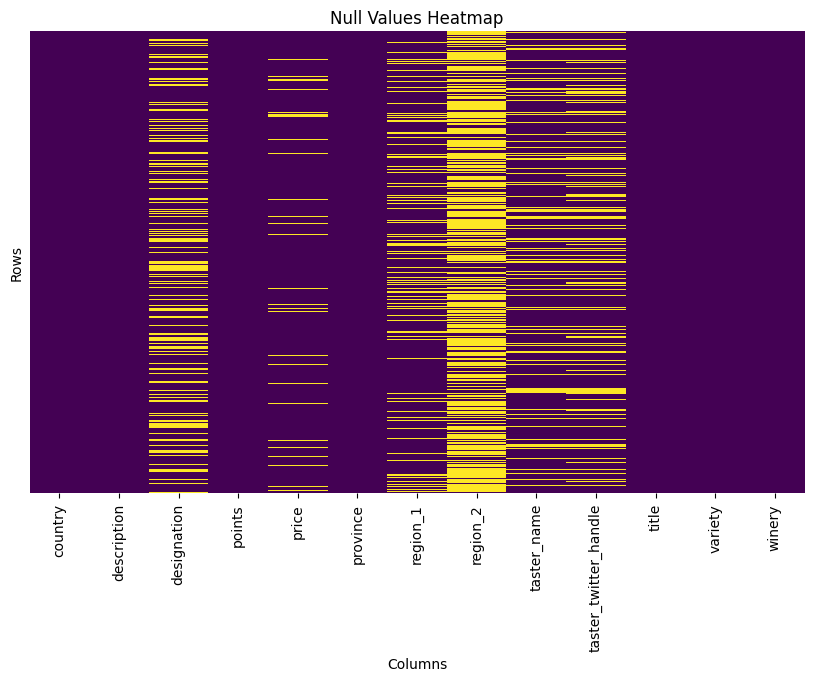

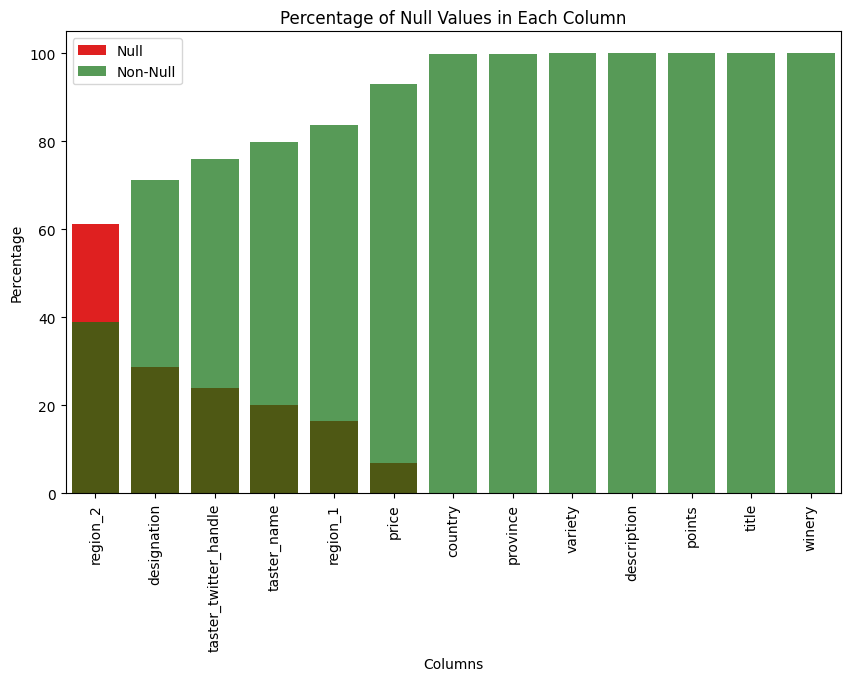

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_null_analysis(df):
    """
    Analyzes null values in the given DataFrame and plots them using a heatmap and a barchart.

    Parameters:
        df (pd.DataFrame): The input DataFrame.
    """
    # Calculate the number of nulls in each column
    null_counts = df.isnull().sum()

    # Calculate the percentage of nulls in each column
    total_rows = len(df)
    null_percentages = (null_counts / total_rows) * 100

    # Calculate the percentage of non-null values in each column
    non_null_percentages = 100 - null_percentages

    # Create a DataFrame to store the null counts and percentages
    null_analysis_df = pd.DataFrame({'Null_Count': null_counts, 'Null_Percentage': null_percentages, 'NonNull_Percentage': non_null_percentages})

    # Sort columns by the percentage of null values in descending order
    null_analysis_df = null_analysis_df.sort_values(by='Null_Percentage', ascending=False)

    # Create a heatmap to visualize the null values
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
    plt.title('Null Values Heatmap')
    plt.xlabel('Columns')
    plt.ylabel('Rows')

    # Create a bar chart to show the percentage of null values in each column
    plt.figure(figsize=(10, 6))
    sns.barplot(x=null_analysis_df.index, y='Null_Percentage', data=null_analysis_df, color='red', label='Null')
    sns.barplot(x=null_analysis_df.index, y='NonNull_Percentage', data=null_analysis_df, color='green', alpha=0.7, label='Non-Null')
    plt.xticks(rotation=90)
    plt.title('Percentage of Null Values in Each Column')
    plt.xlabel('Columns')
    plt.ylabel('Percentage')
    plt.legend()

    plt.show()

# Example usage:
# Assuming you have a DataFrame named 'my_dataframe', you can call the function like this:
# plot_null_analysis(my_dataframe)

plot_null_analysis(wine_df)

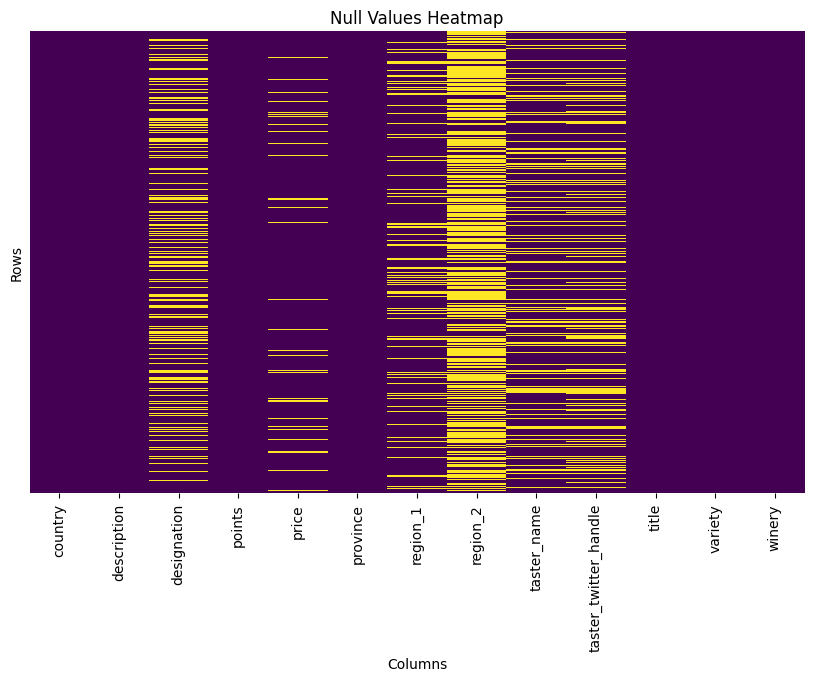

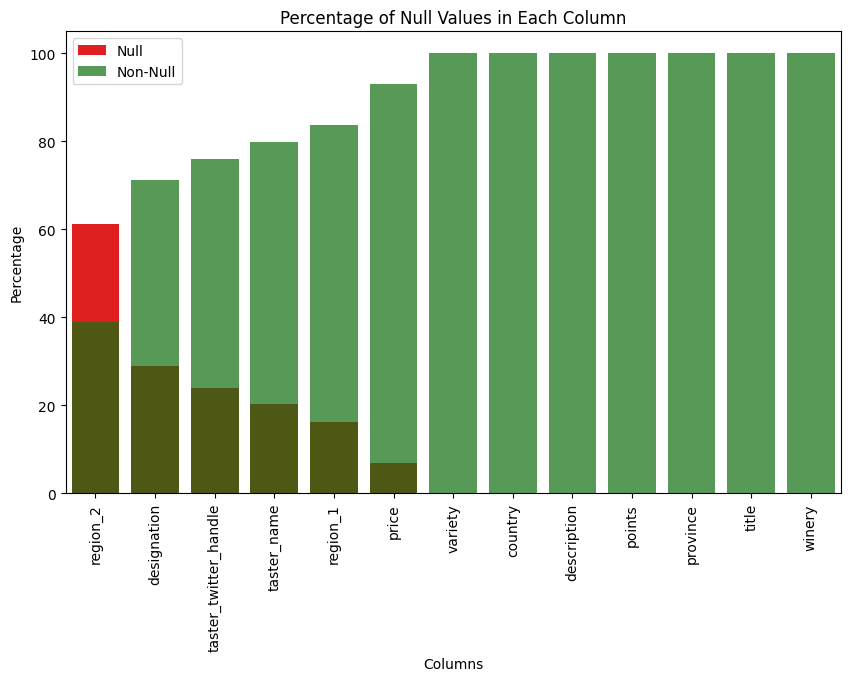

==============START IC VIOLATION REPORT==============
DATAFRAME SUMMARY: 
-----------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 129908 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129908 non-null  object 
 2   designation            92454 non-null   object 
 3   points                 129908 non-null  int64  
 4   price                  120916 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103664 non-null  object 
 9   taster_twitter_handle  98695 non-null   object 
 10  title                  129908 non-null  object 
 11  variety                129907 non-null  object 
 12  winery        

In [34]:
wine_df = wine_df.dropna(subset=['country', 'province'])
plot_null_analysis(wine_df)
ic_violation_report(wine_df)

==============START IC VIOLATION REPORT==============
DATAFRAME SUMMARY: 
-----------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 129908 entries, 0 to 129970
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129908 non-null  object 
 2   designation            92454 non-null   object 
 3   points                 129908 non-null  int64  
 4   price                  120916 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   taster_name            103664 non-null  object 
 8   taster_twitter_handle  98695 non-null   object 
 9   title                  129908 non-null  object 
 10  variety                129907 non-null  object 
 11  winery                 129908 non-null  object 
dtypes: float64(1),

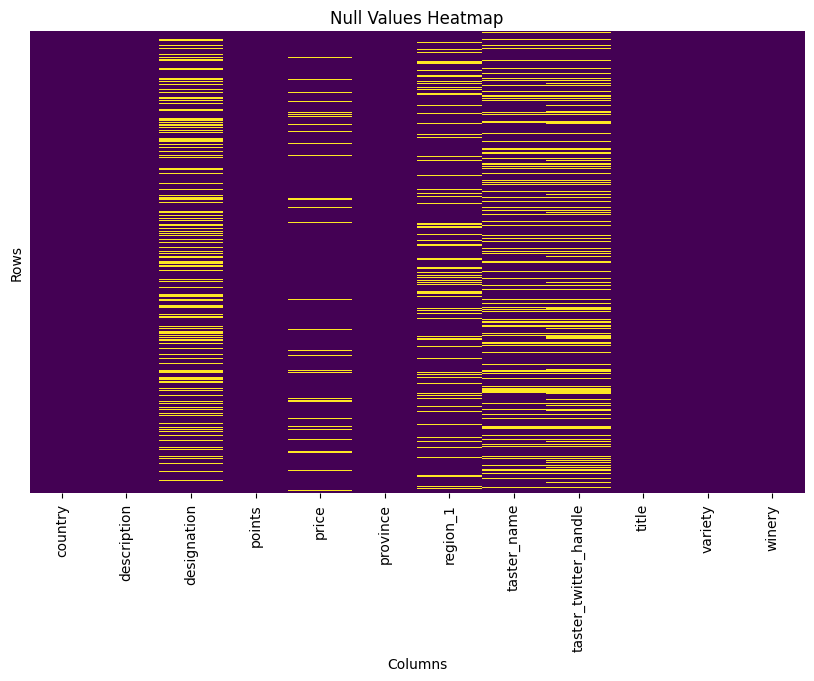

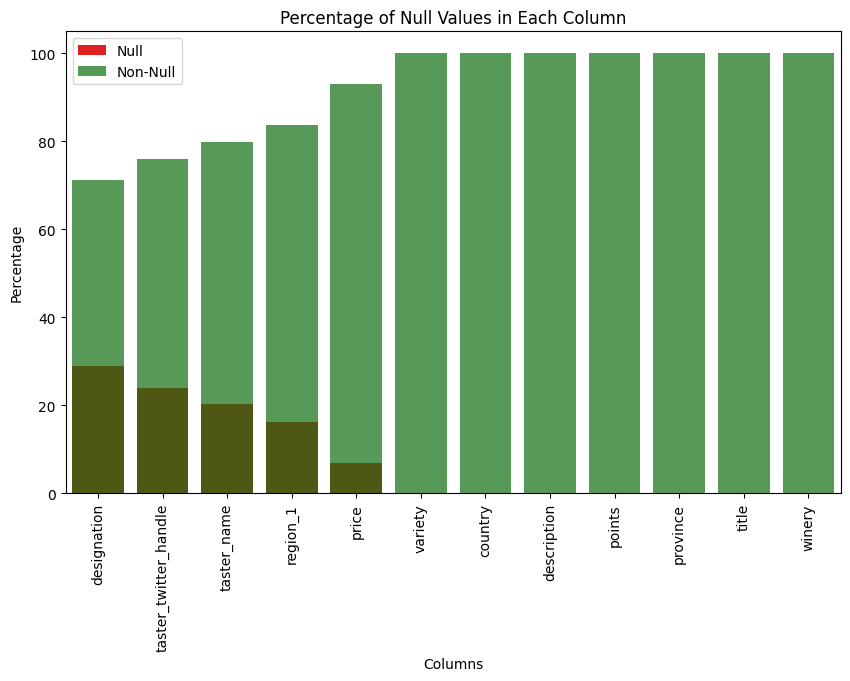

In [35]:
wine_df = wine_df.drop('region_2', axis=1)
ic_violation_report(wine_df)
plot_null_analysis(wine_df)

Text(0, 0.5, 'Designation')

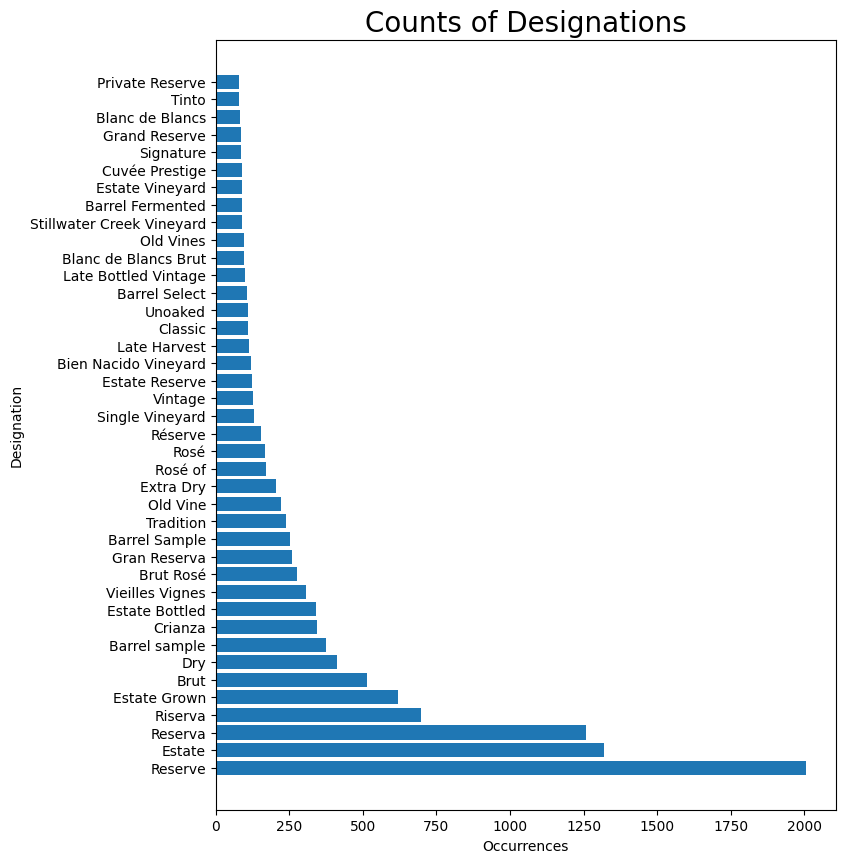

In [36]:
designation = wine_df['designation'].value_counts().head(40)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,10), sharey=True)
ax.barh(y=designation.index, width=designation.values)
ax.set_title('Counts of Designations', fontsize=20)
ax.set_xlabel('Occurrences')
ax.set_ylabel('Designation')

==============START IC VIOLATION REPORT==============
DATAFRAME SUMMARY: 
-----------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 75036 entries, 0 to 129970
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                75036 non-null  object 
 1   description            75036 non-null  object 
 2   designation            75036 non-null  object 
 3   points                 75036 non-null  int64  
 4   price                  70175 non-null  float64
 5   province               75036 non-null  object 
 6   region_1               75036 non-null  object 
 7   taster_name            57748 non-null  object 
 8   taster_twitter_handle  55678 non-null  object 
 9   title                  75036 non-null  object 
 10  variety                75036 non-null  object 
 11  winery                 75036 non-null  object 
dtypes: float64(1), int64(1), obje

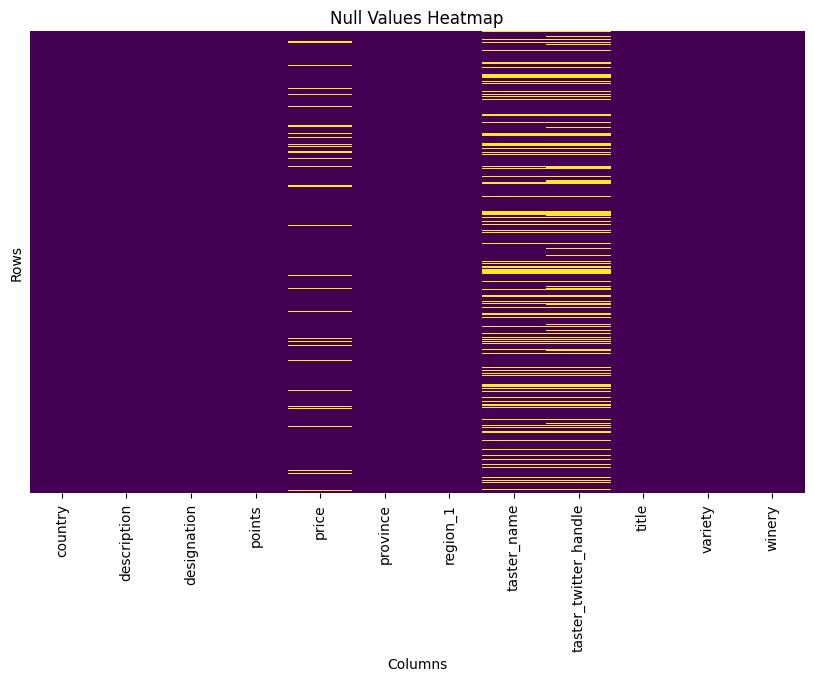

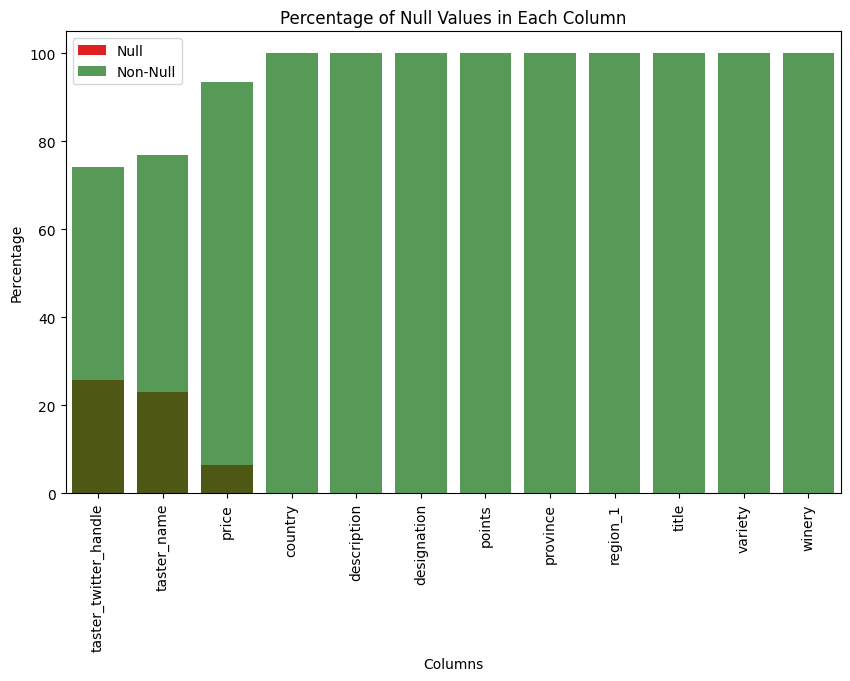

In [37]:
wine_df = wine_df.dropna(subset=['designation', 'region_1'])
ic_violation_report(wine_df)
plot_null_analysis(wine_df)

Text(0, 0.5, 'Region 1')

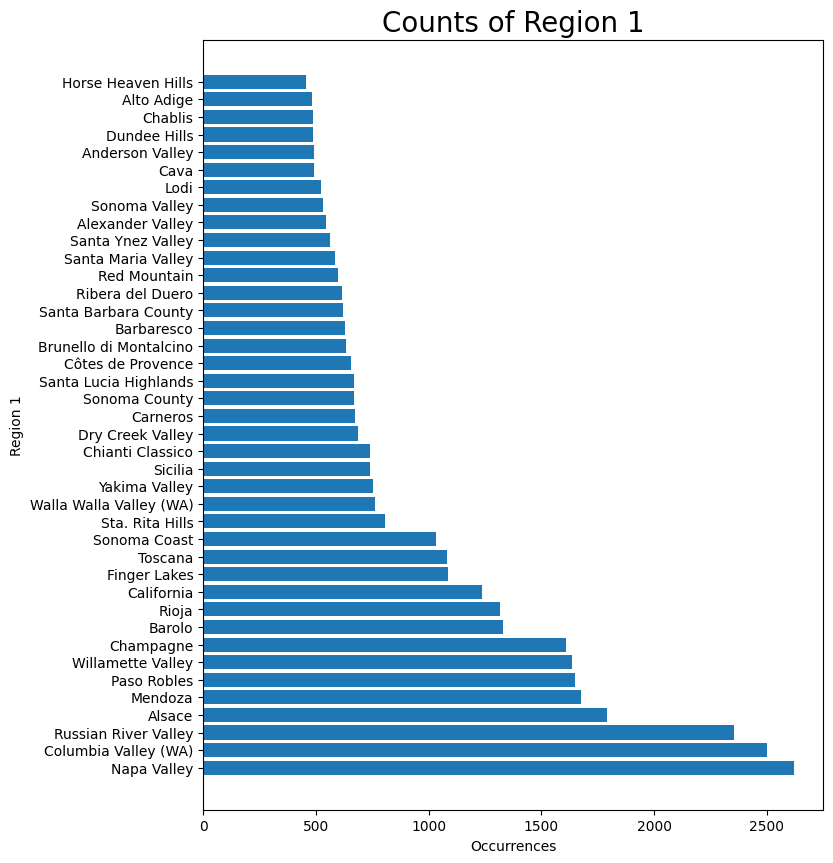

In [38]:
designation = wine_df['region_1'].value_counts().head(40)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,10), sharey=True)
ax.barh(y=designation.index, width=designation.values)
ax.set_title('Counts of Region 1', fontsize=20)
ax.set_xlabel('Occurrences')
ax.set_ylabel('Region 1')

In [39]:
only_name = wine_df.loc[wine_df['taster_twitter_handle'].isnull() & wine_df['taster_name'].notna(),
                   ['taster_name', 'taster_twitter_handle']]
num_only_name = len(only_name.index)

only_twitter = wine_df.loc[wine_df['taster_name'].isnull() & wine_df['taster_twitter_handle'].notna(),
                      ['taster_name', 'taster_twitter_handle']]
num_only_twitter = len(only_twitter.index)

print(f'rows containing a name but no twitter handle: {num_only_name}'
      + f'\nrows containing a twitter handle but no taster name: {num_only_twitter}')

rows containing a name but no twitter handle: 2070
rows containing a twitter handle but no taster name: 0


Text(0.5, 1.0, 'Twitter handles per taster')

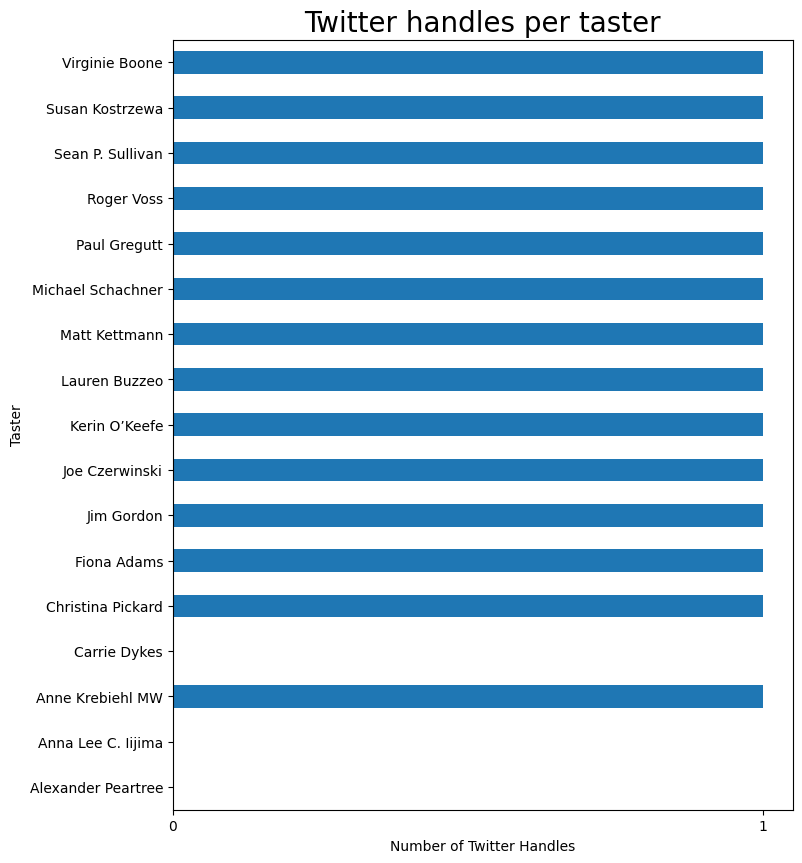

In [40]:
twitter_per_name = wine_df.groupby('taster_name')['taster_twitter_handle'].nunique()
labels = twitter_per_name.index


fig, ax = plt.subplots(figsize=(8,10))
twitter_per_name.plot(kind='barh', ax=ax)
ax.set_xticks([0,1])
ax.set_xlabel('Number of Twitter Handles')
ax.set_ylabel('Taster')
ax.set_title('Twitter handles per taster', fontsize=20)


==============START IC VIOLATION REPORT==============
DATAFRAME SUMMARY: 
-----------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 57748 entries, 0 to 129970
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      57748 non-null  object 
 1   description  57748 non-null  object 
 2   designation  57748 non-null  object 
 3   points       57748 non-null  int64  
 4   price        54170 non-null  float64
 5   province     57748 non-null  object 
 6   region_1     57748 non-null  object 
 7   taster_name  57748 non-null  object 
 8   title        57748 non-null  object 
 9   variety      57748 non-null  object 
 10  winery       57748 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 5.3+ MB


FIELD EMPTY VALUE REPORT: 
-----------------------------------------------------
FIELD - country: 0
FIELD - country: 0
FIELD - country: 0
FIELD - countr

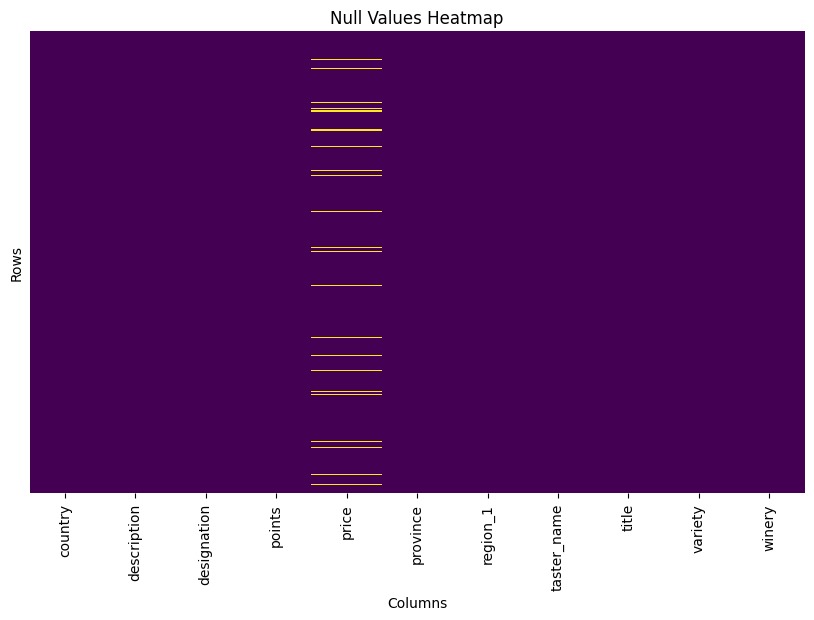

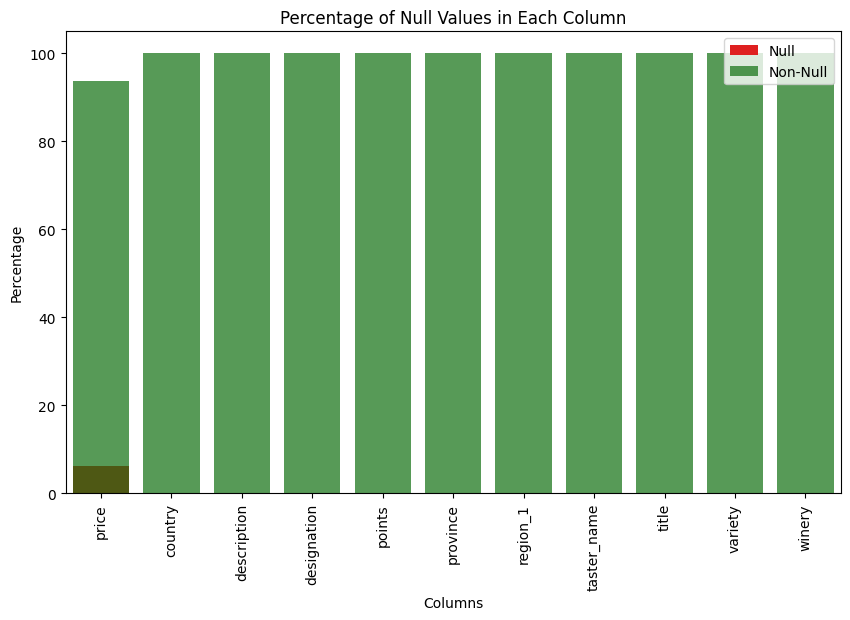

In [41]:
wine_df = wine_df.drop('taster_twitter_handle', axis=1)
wine_df = wine_df.dropna(subset=['taster_name'])
ic_violation_report(wine_df)
plot_null_analysis(wine_df)

In [42]:
df_cleanup = wine_df.loc[:, ['price', 'points', 'country', 'taster_name']]
encoded = pd.get_dummies(df_cleanup[['country', 'taster_name']], prefix=['country', 'taster_name'])
df_cleanup = pd.concat([df_cleanup.drop(['country', 'taster_name'], axis=1), encoded], axis=1)

# training data
df_cleanup_known = df_cleanup.loc[df_cleanup['price'].notnull(), :]
X_known = df_cleanup_known.drop('price', axis=1)
y_known = df_cleanup_known['price']

# prediction data
df_cleanup_unknown = df_cleanup.loc[df_cleanup['price'].isnull(), :]
X_unknown = df_cleanup_unknown.drop('price', axis=1)

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
knn_cleanup = KNeighborsRegressor()
params = {'n_neighbors':[1,5,9]}
gs = GridSearchCV(knn_cleanup, params)
gs.fit(X_known, y_known)
knn_cleanup = gs.best_estimator_

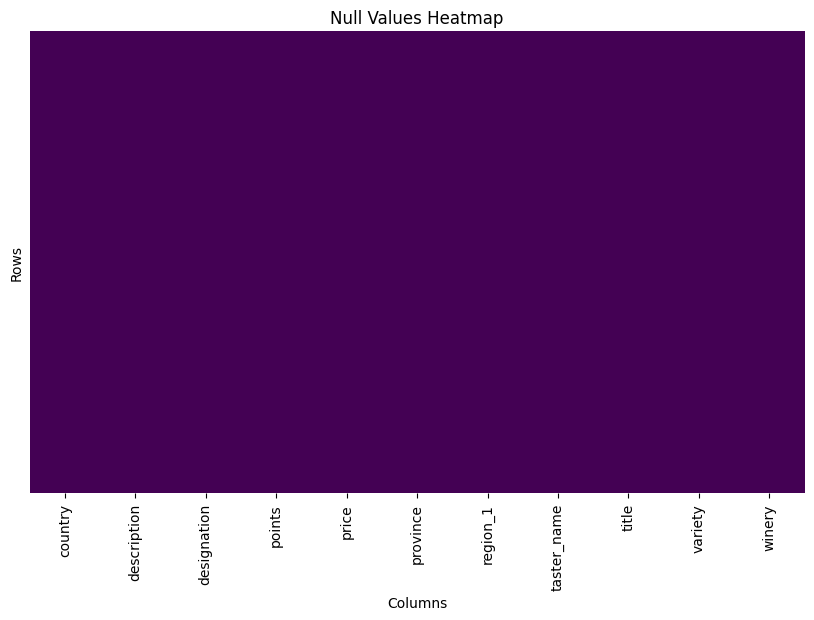

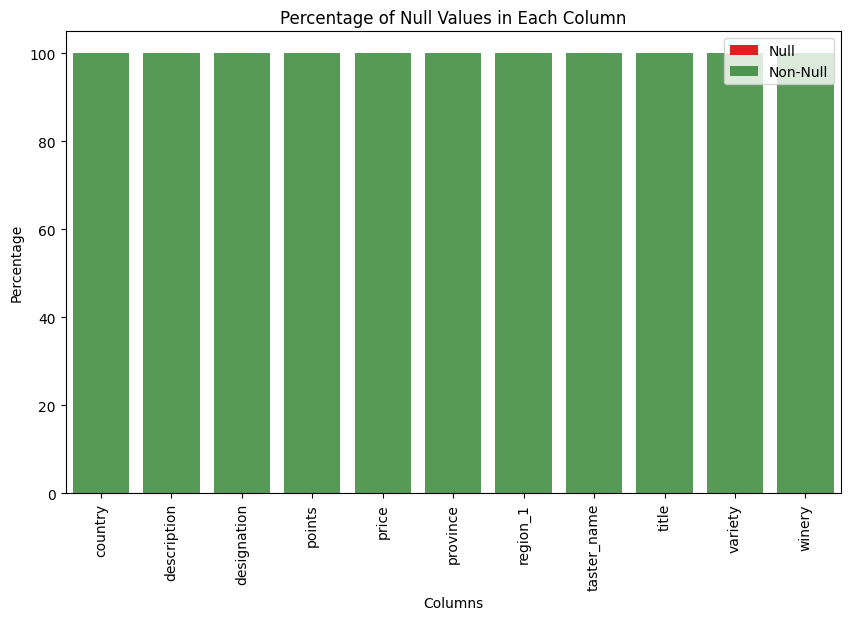

In [44]:
df_known = wine_df.loc[wine_df['price'].notnull(),:]
df_predicted = wine_df.loc[wine_df['price'].isnull(),:]

# to evade SettingWithCopyWarning
df_predicted = df_predicted.drop('price', axis=1)
df_predicted['price'] = knn_cleanup.predict(X_unknown)
wine_df = pd.concat([df_known, df_predicted], axis=0, ignore_index=True)

# shuflle the dataset along rows
wine_df = wine_df.sample(frac=1).reset_index(drop=True)



plot_null_analysis(wine_df)
wine_df.head()
wine_df.to_csv('clean_winery_u1.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')